<a href="https://colab.research.google.com/github/rudyjcruz831/cmpe_272_project_spring2025-/blob/main/HousingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import json
import pandas as pd

file_path = '/content/drive/My Drive/listings2.json'  # Replace with your file path
with open(file_path, 'r') as f:
    data = json.load(f)

dfa = pd.DataFrame(data)  # Convert JSON data to pandas DataFrame

In [3]:
file_path = '/content/drive/My Drive/data.json'  # Replace with your file path
with open(file_path, 'r') as f:
    data2 = json.load(f)
dfb = pd.DataFrame(data)  # Convert JSON data to pandas DataFrame

In [4]:
df = pd.concat([dfa, dfb], ignore_index=True)

In [5]:
display(df)

,address,price,beds,baths,area
0,Castro Valley,2558,2,1,999.0
1,Santa Rosa,1500,1,1,7700.0
2,San Francisco,3203,1,1,374.0
3,San Mateo,2595,1,1,750.0
4,Emeryville,3095,1,1,898.0
...,...,...,...,...,...
19375,Dublin,3117,1,1,1102.0
19376,Union City,2605,1,1,906.0
19377,San Jose,3395,2,1,1142.0
19378,San Jose,2595,1,1,496.0


In [6]:
# Remove rows with zeroes in 'price' or 'area'
df = df[(df['price'] != 0) & (df['area'] != 0) & (df['beds'] != 0) & (df['baths'] != 0) & (df['address'] != '')]


In [7]:
!pip install openai
pip show openai


SyntaxError: invalid syntax (<ipython-input-7-c903222771f4>, line 2)

In [8]:
# Get the initial number of entries
initial_count = len(df)

# Filter out entries with price below 200
df = df[df['price'] >= 200]

# Calculate the number of entries removed
removed_count = initial_count - len(df)

# Print the number of entries removed
print(f"Number of entries removed: {removed_count}")

# Get the initial number of entries
initial_count = len(df)

# Filter out entries with price above 10000
df = df[df['price'] <= 10000]

# Calculate the number of entries removed
removed_count2 = initial_count - len(df)

# Print the number of entries removed
print(f"Number of entries removed: {removed_count}")

Number of entries removed: 168
Number of entries removed: 168


In [9]:
from scipy import stats
import numpy as np
def remove_outliers_zscore(df, column, threshold=3):
    initial_count = len(df)  # Get the initial count of rows
    z = np.abs(stats.zscore(df[column]))
    df_out = df[(z < threshold)]
    removed_count = initial_count - len(df_out)  # Calculate the difference
    print(f"Number of entries removed: {removed_count}")  # Print the result
    return df_out

df = remove_outliers_zscore(df, 'price')

Number of entries removed: 266


In [12]:
# Print unique address options
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Create a LabelEncoder for the 'address' column
address_encoder = LabelEncoder()

# Fit the encoder on the 'address' column and transform it in the DataFrame
df['address_encoded'] = address_encoder.fit_transform(df['address'])

unique_addresses = df['address'].unique()
print("Unique address options:")
count=0
for address in unique_addresses:
    count+=1
    # print(address)
print(count)
# Print the updated DataFrame (optional)
# print("\nDataFrame with encoded address:")
# print(df)

Unique address options:
152


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

df = df.dropna(subset=['price']) # Add this line to drop rows where 'price' is NaN

# Features (X) and Target (y)
X = df[['address_encoded', 'beds', 'baths', 'area']]
y = df['price']


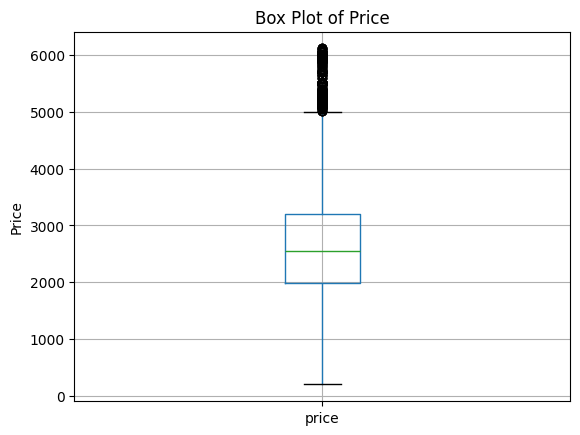

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df.boxplot(column=['price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
display(df)

In [15]:
# Drop rows with any missing values
df = df.dropna()

# Drop rows with missing values in 'price' or 'area' columns
df = df.dropna(subset=['price', 'area'])

# Drop rows where all values are missing
df = df.dropna(how='all')

# Modify df in place (without creating a new copy)
df.dropna(inplace=True)

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are already defined from previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',  # Specify objective for regression
                             n_estimators=100,          # Number of boosting rounds (trees)
                             learning_rate=0.1,         # Step size shrinkage used in optimization
                             max_depth=3)               # Maximum depth of a tree

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 697.5136647406988


In [18]:
# Assuming you have the address_encoder from your previous code
# encoded_address = address_encoder.transform(['95110'])[0]

# Create input data
input_data = [[56, 1, 1, 700]]  # [address_encoded, beds, baths, area]

In [19]:
predicted_price = xgb_model.predict(input_data)[0]
print(f"Predicted price: ${predicted_price:.2f}")

Predicted price: $2322.38


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [21]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 486525.3125
Root Mean Squared Error (RMSE): 697.5136647406988
R-squared (R2): 0.5189703106880188
Mean Absolute Error (MAE): 497.2937927246094


In [22]:
import pandas as pd

# Calculate average (mean)
average_price = df['price'].mean()
low= df['price'].min()
# Calculate median
median_price = df['price'].median()

# Calculate percentile (e.g., 75th percentile)
percentile_75 = df['price'].quantile(0.75)

# Print the results
print(f"Low Price: {low}")
print(f"Average Price: {average_price}")
print(f"Median Price: {median_price}")
print(f"75th Percentile Price: {percentile_75}")

Low Price: 200
Average Price: 2750.814223101937
Median Price: 2650.0
75th Percentile Price: 3290.0


In [29]:
!pip install skl2onnx  # Install the missing package
!pip install onnxmltools
!pip install onnxruntime # Install onnxruntime using pip



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.9 MB/s eta 0:00:00


In [30]:
from onnxmltools.convert import convert_xgboost
from skl2onnx.common.data_types import FloatTensorType

# Set correct feature names for ONNX
booster = xgb_model.get_booster()
booster.feature_names = [f"f{i}" for i in range(X.shape[1])]

# Convert to ONNX format
initial_type = [('input', FloatTensorType([None, X.shape[1]]))]
onnx_model = convert_xgboost(xgb_model, initial_types=initial_type)

# Save to file
with open("xgb_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
print("✅ Model exported to ONNX as 'xgb_model.onnx'")

✅ Model exported to ONNX as 'xgb_model.onnx'


In [32]:
import onnxruntime as ort
import numpy as np

# Start ONNX runtime session
session = ort.InferenceSession("xgb_model.onnx")

# Get the input name for the ONNX model
input_name = session.get_inputs()[0].name

# Prepare input data as float32 numpy array
input_data = np.array([[43, 1, 1, 700]], dtype=np.float32)

# Run inference
output = session.run(None, {input_name: input_data})

predicted_price = float(output[0][0])
print(f"Predicted price: ${predicted_price:.2f}")


Predicted price: $2225.37


<ipython-input-32-ef6d811acf95>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(output[0][0])




# Linear Regression Implementation



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# K Nearest Neighbors Implementation






In [ ]:

# Create and train the KNN model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}") # To see the output, run the code.



In [ ]:
pip install onnxmltools onnxruntime xgboost


In [ ]:
import onnxmltools
import xgboost as xgb
from onnxmltools.convert import convert_xgboost
from onnxmltools.convert.common.data_types import FloatTensorType

initial_type = [('input', FloatTensorType([None, X_train.shape[1]]))]

# Convert
onnx_model = convert_xgboost(xgb_model, initial_types=initial_type)

# Save to file
with open("xgb_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


In [ ]:
import onnxruntime as rt
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Define the input data type for the ONNX model
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

# Convert the XGBoost model to ONNX format
onx = convert_sklearn(xgb_model, 'xgb_model', initial_types=initial_type)

# Save the ONNX model to a file
with open("xg_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [ ]:
!pip install onnxruntime
import onnxruntime as rt
!pip install skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Define the input data type for the ONNX model
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

# Convert the XGBoost model to ONNX format
onx = convert_sklearn(xgb_model, 'xgb_model', initial_types=initial_type)

# Save the ONNX model to a file
with open("xgboost_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [ ]:
import re

def extract_city(text):
  # Define regex patterns to match city names in different formats
  pattern1 = r"city of ([a-zA-Z]+),"  # Matches "city of [City Name],"
  pattern2 = r"is in ([a-zA-Z]+),"  # Matches "is in [City Name],"
  pattern3 = r"is in ([a-zA-Z\s]+)" # Matches "is in [City Name] [State]"

  # Try to find a match using the patterns
  match = re.search(pattern1, text) or re.search(pattern2, text) or re.search(pattern3, text)

  # If a match is found, extract the city name
  if match:
    city_name = match.group(1)
    # Remove trailing spaces and commas if present
    city_name = city_name.strip().rstrip(",")
    return city_name
  else:
    return None  # Or handle the case where no city is found

# Example usage
sentences = [
    "Zip code 94538 is in the city of Fremont, located in Alameda County, California.",
    "Zip code 94124 is in San Francisco, California"
]

for sentence in df['city'].unique():
  city = extract_city(sentence)
  print(f"City: {city}")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

df = df.dropna(subset=['price']) # Add this line to drop rows where 'price' is NaN

# Features (X) and Target (y)
X = df[['address', 'beds', 'baths', 'area']]
y = df['price']

# Create a LabelEncoder for the 'address' column
address_encoder = LabelEncoder()

# Fit the encoder on the 'address' column and transform it using .loc
X.loc[:, 'address_encoded'] = address_encoder.fit_transform(X['address'])

# Drop the original 'address' column (optional but recommended)
X = X.drop('address', axis=1)

# Features (X) and Target (y)
X = X[['address_encoded', 'beds', 'baths', 'area']]  # Use the encoded address
y = df['price']

In [ ]:
unique_addresses = df['address'].unique()
city_mapping = {}  # Create a dictionary to store address-city mappings

for address in unique_addresses:
    city_mapping[address] = get_city_name(address)

# Now you have a dictionary 'city_mapping' where:
# - Keys are the unique addresses
# - Values are the corresponding city names obtained from OpenAI API

# Add a new 'city' column to the DataFrame using the mapping:
df['city'] = df['address'].map(city_mapping)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create an imputer to replace missing values with the most frequent value
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the training data and transform both training and testing data
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)



In [ ]:
display(df['city'])
df['city'].unique()